In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
class PuzzleBezier:
    def __init__(self, rows, cols, image_path, curviness=0.2):
        self.rows = rows
        self.cols = cols
        self.image = np.array(Image.open(image_path).resize((cols * 100, rows * 100)))
        self.grid = self.create_grid()
        self.curviness = curviness # here by that parameter I can control the curviness of the curve..

    def create_grid(self):
        x = np.linspace(0, 1, self.cols + 1)
        y = np.linspace(0, 1, self.rows + 1)
        return np.meshgrid(x, y)

    def bezier_curve(self, P0, P1, P2, num_points=100):
        t = np.linspace(0, 1, num_points)
        Bx = (1 - t) ** 2 * P0[0] + 2 * (1 - t) * t * P1[0] + t ** 2 * P2[0]
        By = (1 - t) ** 2 * P0[1] + 2 * (1 - t) * t * P1[1] + t ** 2 * P2[1]
        # formula directly from wikipedia (Wikipedia is the best when it comes to math)
        return Bx, By

    def plot_puzzle(self):
        x, y = self.grid
        plt.figure(figsize=(8, 8))
        plt.imshow(self.image, extent=(0, 1, 0, 1), aspect="auto")

        for row in range(self.rows + 1):
            for col in range(self.cols + 1):
            
                if col < self.cols:
                    P0 = (x[row, col], y[row, col])
                    P2 = (x[row + 1, col], y[row + 1, col]) if row < self.rows else P0

                
                    offset_x = np.random.uniform(-self.curviness, self.curviness)
                    offset_y = np.random.uniform(-self.curviness, self.curviness)
                    P1 = (
                        P0[0] + offset_x,
                        (P0[1] + P2[1]) / 2 + offset_y
                    )
                    bx, by = self.bezier_curve(P0, P1, P2)
                    plt.plot(bx, by, color="black")

                # here are the horizontall edges
                if row < self.rows:
                    P0 = (x[row, col], y[row, col])
                    P2 = (x[row, col + 1], y[row, col + 1]) if col < self.cols else P0

                    offset_x = np.random.uniform(-self.curviness, self.curviness)
                    offset_y = np.random.uniform(-self.curviness, self.curviness)
                    P1 = (
                        (P0[0] + P2[0]) / 2 + offset_x,
                        P0[1] + offset_y
                    )
                    bx, by = self.bezier_curve(P0, P1, P2)
                    plt.plot(bx, by, color="black")

        plt.axis("equal")
        plt.axis("off")
        plt.show()

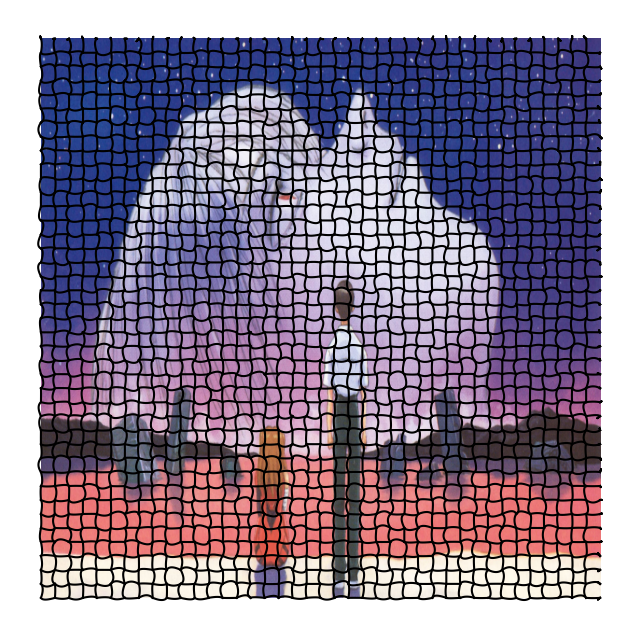

In [4]:
image_path = 'Images/EndOfEvangelion.jpg'  # Path to the input image
puzzle = PuzzleBezier(rows=40, cols=40, image_path=image_path, curviness=0.01)
puzzle.plot_puzzle()